# Show split sample distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Pie:
    
    def __init__(self, polarity):
        self.file_name = './TripAdvisor_hotel_{}.xlsx'.format(polarity)
        self.data = pd.read_excel(self.file_name, header=None)
        self.polarity_symbol = {'+': 'positive', '-': 'negative', '0': 'neutral', 'c': 'conflict'}
        self.num_pos, self.num_neu, self.num_neg = 0, 0, 0
        self.polarities = []
        self.get_polarities()
        
    def __call__(self):
        self.sum_polarity()
        self.show_distribution()
        
    def get_polarity(self, aspect_term):
        tmp = aspect_term.split(']')
        polarity = self.polarity_symbol[tmp[1].strip('[')]
        return polarity
        
    def get_polarities(self):
        max_num_polarity = len(self.data.columns)
        polarities = []
        for content_idx in range(len(self.data)):
            for polarity_idx in range(3, max_num_polarity):
                aspect_term = self.data.loc[content_idx, polarity_idx]
                if not pd.isna(aspect_term):
                    try:
                        polarity = self.get_polarity(aspect_term)
                        content = {}
                        content['polarity'] = polarity
                        self.polarities.append(content)
                    except:
                        continue
    
    def sum_polarity(self):
        """
        Summarize polarity
        """
        for polarity in self.polarities:
            if polarity['polarity'] == 'positive':
                self.num_pos += 1
            elif polarity['polarity'] == 'neutral':
                self.num_neu += 1
            elif polarity['polarity'] == 'negative':
                self.num_neg += 1
        print('[Positive: {} Neutral: {} Negative: {}]\n'.
              format(self.num_pos, self.num_neu, self.num_neg))
        
    def show_distribution(self):
        def size(pct, all_vals):
            absolute = int(pct / 100. * np.sum(all_vals))
            return '{:.1f}%\n({:d})'.format(pct, absolute)
        polarities = ['positive', 'neutral', 'negative']
        nums = [self.num_pos, self.num_neu, self.num_neg]
        fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
        explode = (0, 0, 0.1)
        wedges, texts, autotexts = ax.pie(nums, autopct=lambda pct: size(pct, nums),
                                          explode=explode,
                                          textprops=dict(color='w'),
                                          shadow=False, startangle=90)
        ax.legend(wedges, polarities,
                  title='Polarities',
                  loc='upper right',
                  bbox_to_anchor=(1, 0, 0.5, 1))
        plt.setp(autotexts, size=12, weight='bold')
        plt.show()

[Positive: 2869 Neutral: 142 Negative: 73]



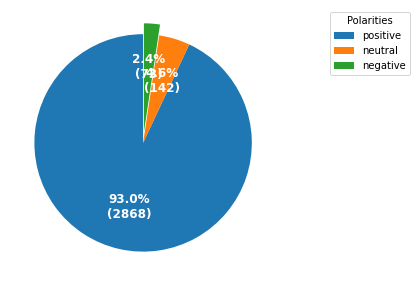

In [3]:
pie = Pie('positive')
pie()

[Positive: 123 Neutral: 1412 Negative: 119]



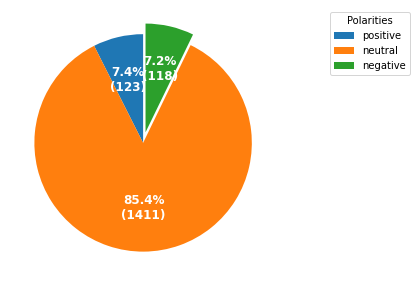

In [4]:
pie = Pie('neutral')
pie()

[Positive: 36 Neutral: 103 Negative: 2451]



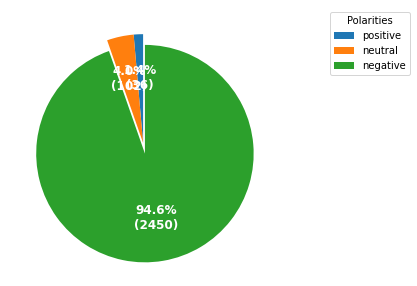

In [5]:
pie = Pie('negative')
pie()